In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import numpy as np

import lbg_forecast.sps as sps
import lbg_forecast.popmodel as pop
import lbg_forecast.sfh as sfh
import lbg_forecast.igm as igm
import lbg_forecast.distributions as dstr
import lbg_forecast.hyperparams as hyp

In [3]:
def simulate_sample_photometry_dpl(nsamples, spectra=False):

    #Define SPS Model
    sps_model = sps.initialise_sps_model(sfh_type=3, dust_type=2)
    bounds = hyp.define_hyperparameter_bounds()
    hyperparams = hyp.sample_hyper_parameters(bounds, sig_min=0.1)
    i = 0
    photo_data = []
    source_data = []
    while(i <  nsamples):

        #Update Model and draw Priors
        sps_params = pop.galaxy_population_model_dpl(hyperparams)
        sps.update_sps_model_dpl(sps_model, sps_params)

        #Generate Photometry
        photo_data.append(sps.simulate_photometry_lsst_fsps(sps_model, logmass=sps_params[15]))
        source_data.append(sps_params)

        #Plot Spectra
        if(spectra):
            spectrum = sps.simulate_sed(sps_model, sps_params)
            
            sps.plot_sed(spectrum, scaley = 16, xmin=2000, xmax=12000, ymin=0,
                ymax=1.4, xsize=20, ysize=10, 
                fontsize=32, log=False, c = 'k')
            
            sps.plot_lsst_filters(factor=1)

        i+=1

    return [np.asarray(photo_data), np.asarray(source_data), hyperparams]

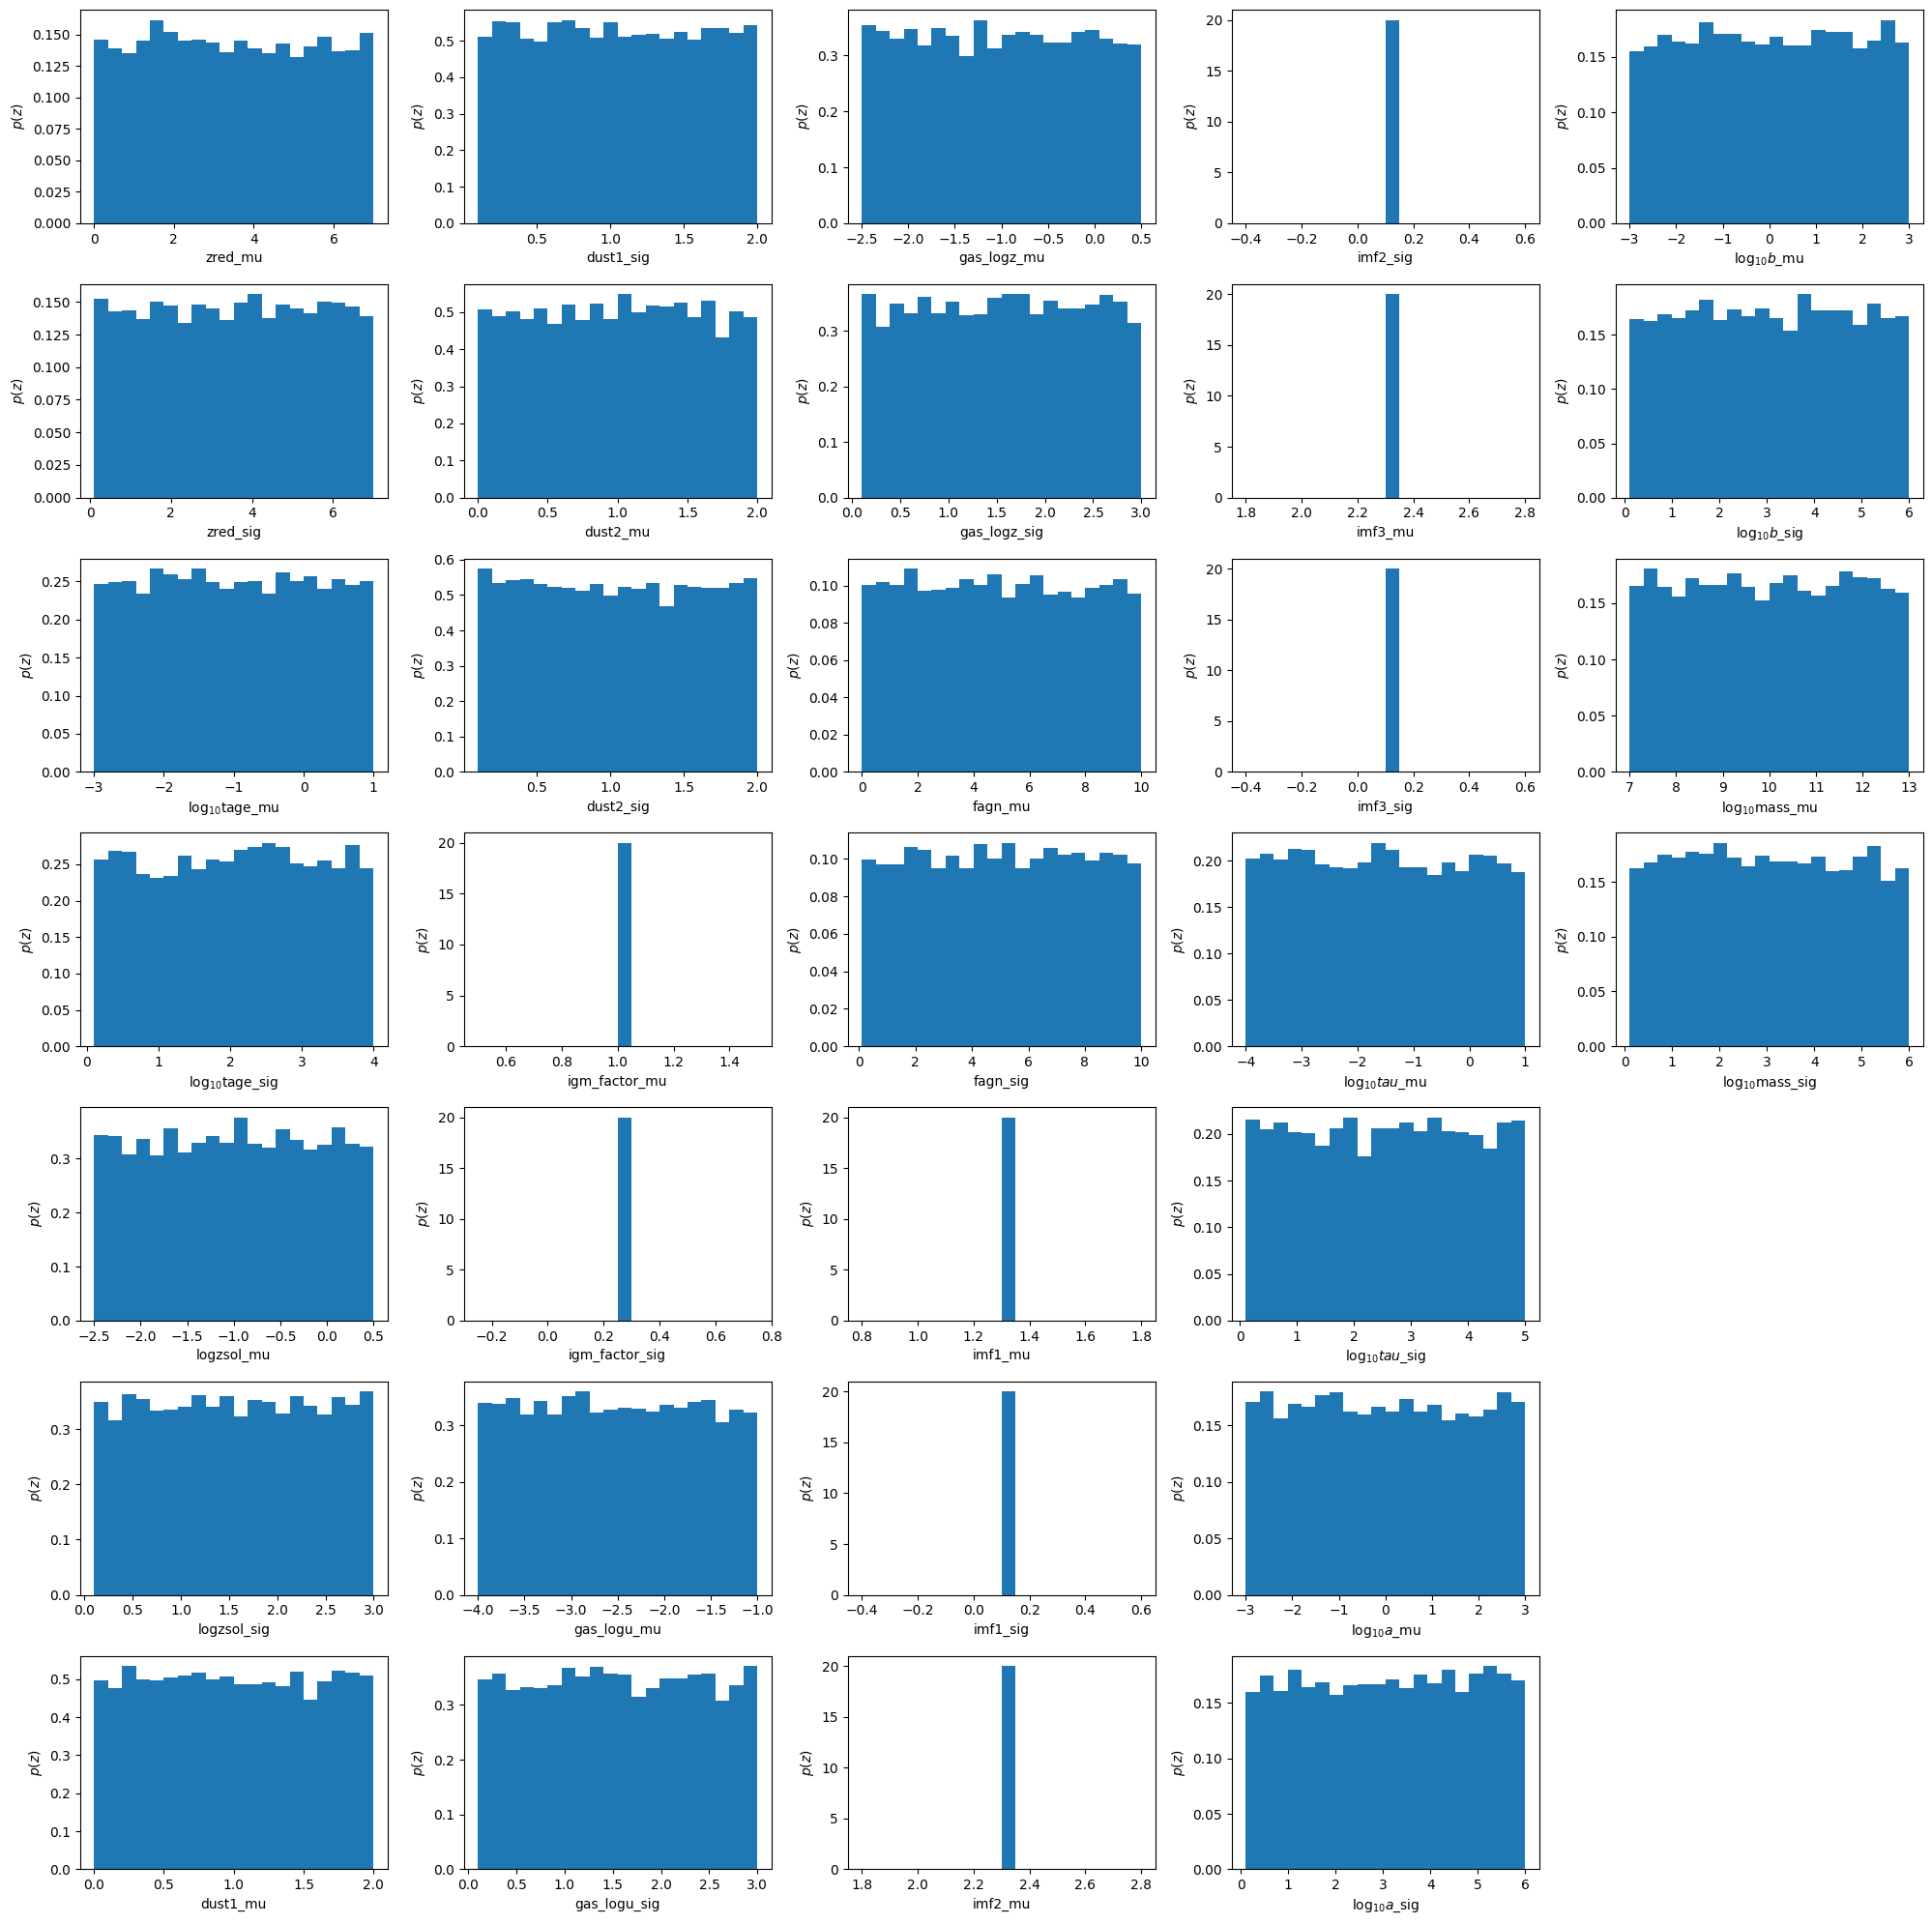

In [4]:
hyp.plot_hyperparameters(10000, hyp.define_hyperparameter_bounds(), sigmin=0.1, rows=7, nbins=20)

In [5]:
data = simulate_sample_photometry_dpl(1)
print(data)

[array([[37.27439907, 34.10455896, 32.77050401, 32.18388234, 31.73936964,
        31.38323054]]), array([[ 3.83684735, -2.39655534, -1.37414877,  1.48719752,  1.721379  ,
         0.84064761, -2.17470675, -0.83810003,  3.8400137 ,  1.14637026,
         2.33938211,  2.28383807, -1.5334368 , -0.32094999, -0.80624723,
         7.91105177]]), array([[ 3.44093117,  0.70567924],
       [-0.21766418,  3.04820133],
       [-1.19481766,  1.50503419],
       [ 1.51213694,  1.62417999],
       [ 1.95500445,  0.21086517],
       [ 1.        ,  0.25      ],
       [-2.36613311,  1.77874798],
       [-0.99349761,  0.59176469],
       [ 9.54035997,  7.96375193],
       [ 1.3       ,  0.1       ],
       [ 2.3       ,  0.1       ],
       [ 2.3       ,  0.1       ],
       [ 0.84283149,  1.78754628],
       [-0.47647855,  1.48905886],
       [ 0.12372641,  5.01038988],
       [10.51623311,  2.80722631]])]


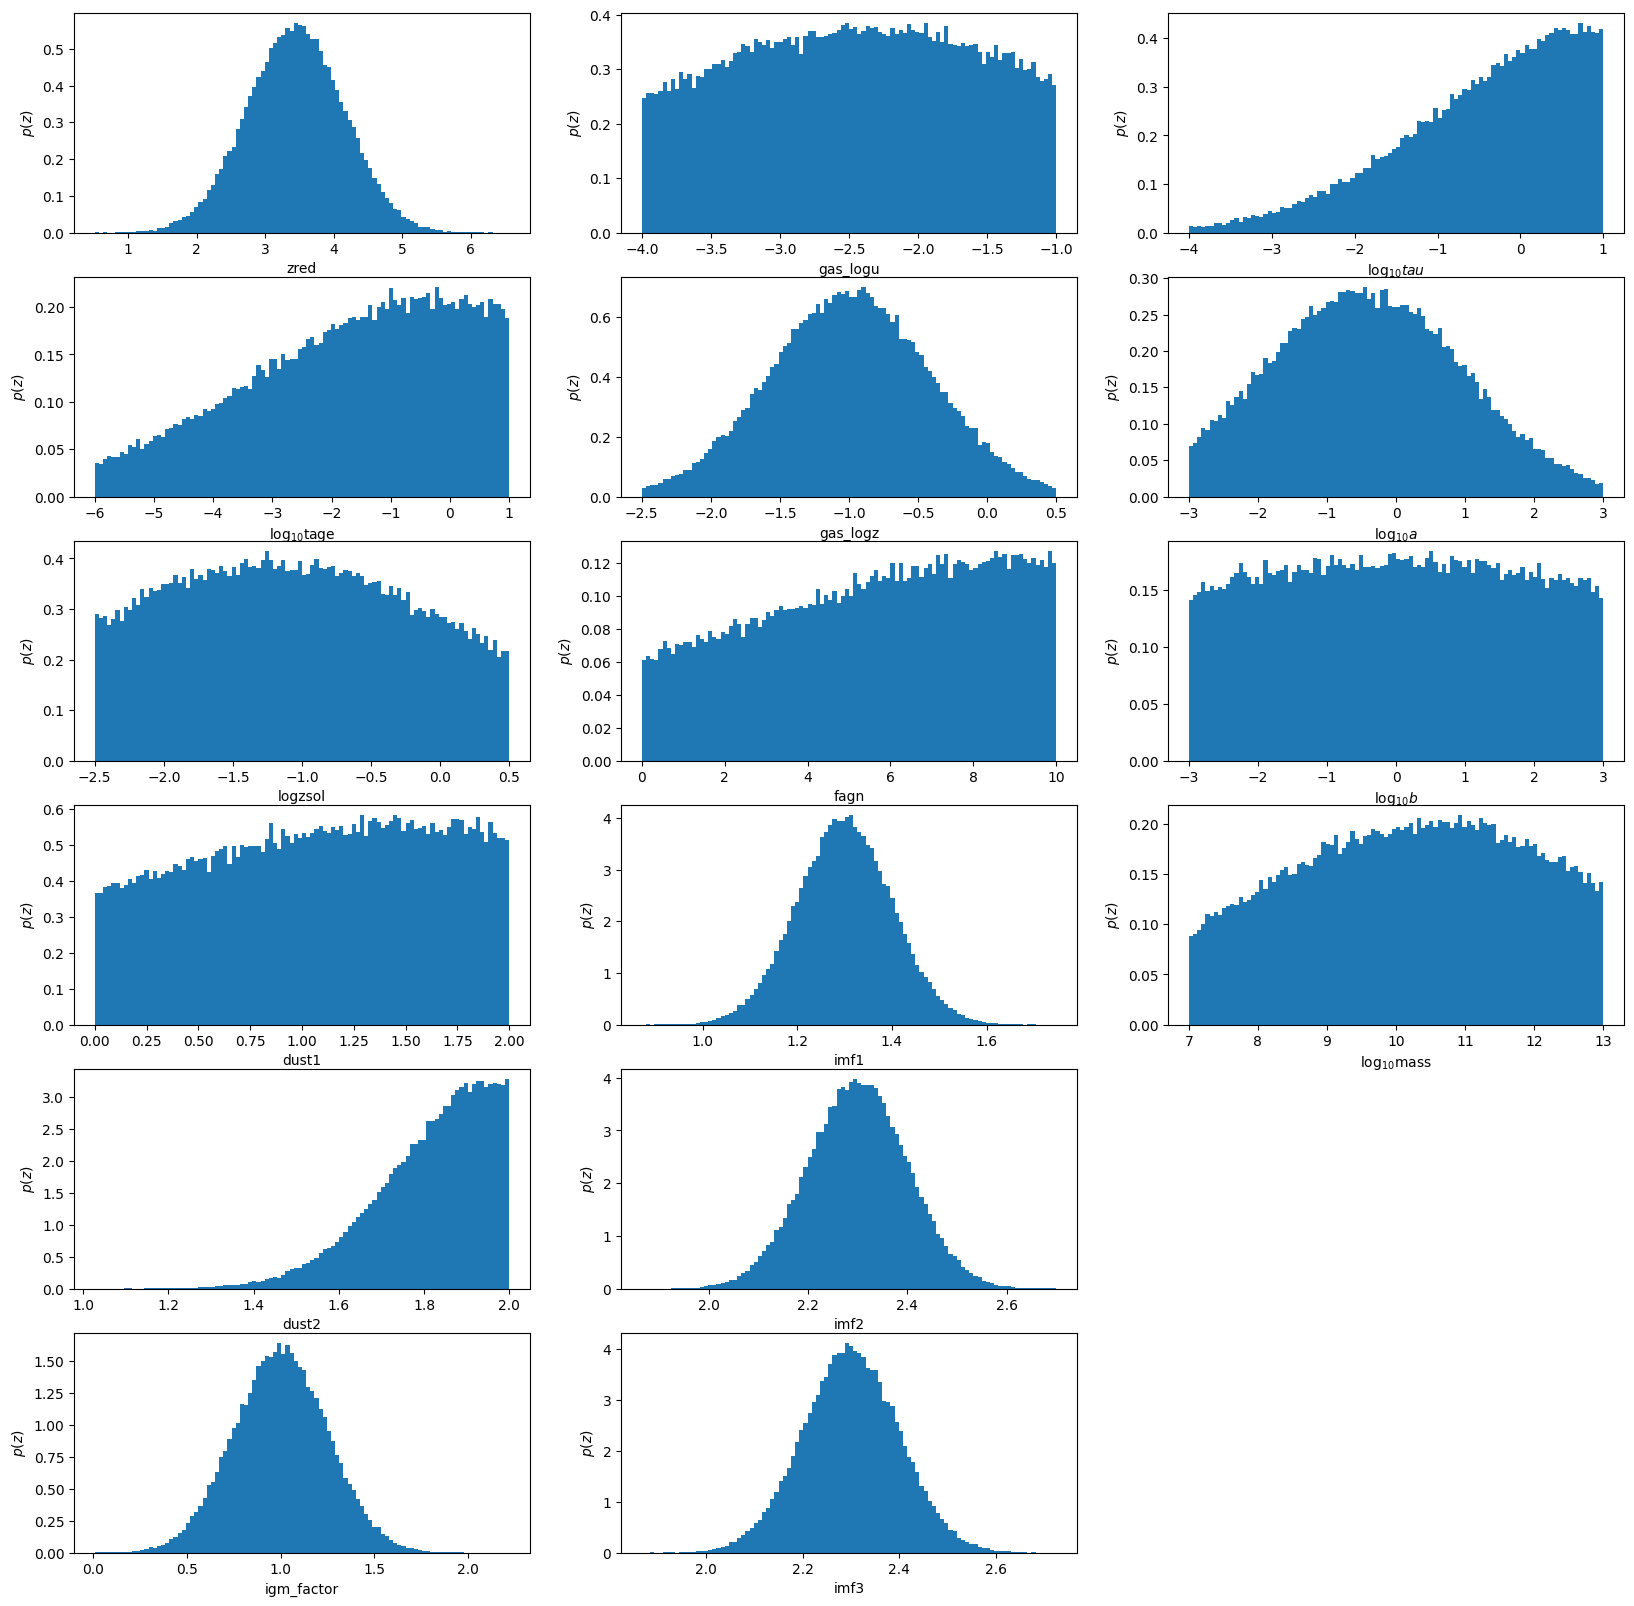

In [6]:
pop.plot_galaxy_population(100000, hparams=data[2], rows=6, nbins=100)